<a href="https://colab.research.google.com/github/DaverArenas/MachineLearning_Introduction/blob/main/VectorSoporte_Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

In [ ]:
##BASE DE DATOS DE KAGGLE: BANK MARKETING
df = pd.read_csv('/content/drive/MyDrive/Especializacion BigData EIA/FundamentosAnalitica/CSV/bank-additional-full.csv', sep=';')

In [ ]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
numerica = []
for col in df.columns:
  if df[col].dtypes != 'object':
    numerica.append(col)

In [ ]:
categorica = []
for col in df.columns:
  if df[col].dtypes == 'object':
    categorica.append(col)

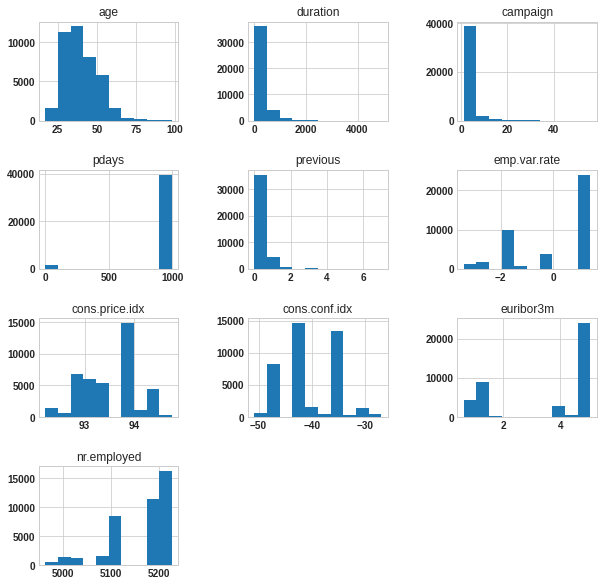

In [ ]:
df.hist(column=numerica, figsize=(10,10))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

In [ ]:
##Convertimos las siguientes variables categoricas en variables numericas usando el método Map
df['poutcome'] = df['poutcome'].map({'failure': -1, 'nonexistent': 0, 'success':1})

In [ ]:
df['default'] = df['default'].map({'no': -1, 'unknown': 0, 'yes':1})
df['housing'] = df['housing'].map({'no': -1, 'unknown': 0, 'yes':1})
df['loan'] = df['loan'].map({'no': -1, 'unknown': 0, 'yes':1})

In [ ]:
##Otra forma de convertir las variables categoricas en numericas, usando el método get dummies
nominal = ['job', 'marital', 'education', 'contact', 'month', 'day_of_week']
df_pro = pd.get_dummies(df, columns=nominal)

In [ ]:
df_pro

,age,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,-1,-1,-1,261,1,999,0,0,1.1,...,0,1,0,0,0,0,1,0,0,0
1,57,0,-1,-1,149,1,999,0,0,1.1,...,0,1,0,0,0,0,1,0,0,0
2,37,-1,1,-1,226,1,999,0,0,1.1,...,0,1,0,0,0,0,1,0,0,0
3,40,-1,-1,-1,151,1,999,0,0,1.1,...,0,1,0,0,0,0,1,0,0,0
4,56,-1,-1,1,307,1,999,0,0,1.1,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,-1,1,-1,334,1,999,0,0,-1.1,...,0,0,1,0,0,1,0,0,0,0
41184,46,-1,-1,-1,383,1,999,0,0,-1.1,...,0,0,1,0,0,1,0,0,0,0
41185,56,-1,1,-1,189,2,999,0,0,-1.1,...,0,0,1,0,0,1,0,0,0,0
41186,44,-1,-1,-1,442,1,999,0,0,-1.1,...,0,0,1,0,0,1,0,0,0,0


In [ ]:
df['y'] = df['y'].map({'yes':1, 'no':0}) 

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_pro.drop('y', axis=1)

In [ ]:
y =  df_pro['y']
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [ ]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
X_train

,age,default,housing,loan,duration,campaign,pdays,previous,poutcome,emp.var.rate,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
32694,30,0,1,-1,91,1,999,0,0,-1.8,...,0,1,0,0,0,0,1,0,0,0
39374,58,-1,1,-1,113,4,999,0,0,-1.8,...,1,0,0,0,0,0,1,0,0,0
13543,32,-1,-1,-1,624,1,999,0,0,1.4,...,0,0,0,0,0,0,0,1,0,0
37649,26,-1,1,-1,215,1,999,1,-1,-2.9,...,0,0,0,0,0,0,0,0,1,0
13150,48,-1,1,-1,74,1,999,0,0,1.4,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7813,43,0,-1,-1,114,1,999,0,0,1.4,...,0,0,0,0,0,0,1,0,0,0
32511,42,-1,1,-1,114,7,999,1,-1,-1.8,...,0,1,0,0,0,1,0,0,0,0
5192,36,-1,1,1,95,1,999,0,0,1.1,...,0,1,0,0,0,1,0,0,0,0
12172,37,-1,-1,-1,305,1,999,0,0,1.4,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.fit_transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
params = [{'kernel': ['rbf', 'linear'], 'C':list(range(1,2))}]
clf = GridSearchCV(SVC(), params, cv=5, scoring='precision')

In [ ]:
X_train

NameError: ignored

In [ ]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1], 'kernel': ['rbf', 'linear']}],
             scoring='precision')

In [ ]:
clf.cv_results_

{'mean_fit_time': array([16.84498591, 40.88530331]),
 'mean_score_time': array([3.90856061, 1.5275279 ]),
 'mean_test_score': array([0.65727542, 0.65494479]),
 'param_C': masked_array(data=[1, 1],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'}, {'C': 1, 'kernel': 'linear'}],
 'rank_test_score': array([1, 2], dtype=int32),
 'split0_test_score': array([0.6636971 , 0.62962963]),
 'split1_test_score': array([0.66888889, 0.67105263]),
 'split2_test_score': array([0.67755991, 0.68169761]),
 'split3_test_score': array([0.63084112, 0.62760417]),
 'split4_test_score': array([0.64539007, 0.66473988]),
 'std_fit_time': array([0.65755897, 0.97141466]),
 'std_score_time': array([0.1411243 , 0.01340701]),
 'std_test_score': array([0.01689737, 0.02217876])}

In [ ]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score, accuracy_score

In [ ]:
precision_score(y_test, y_pred)

0.6530249110320284